# SYDE 556/750 --- Assignment 4
**Student ID: 20757197**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE is: 0.0042332407493579135


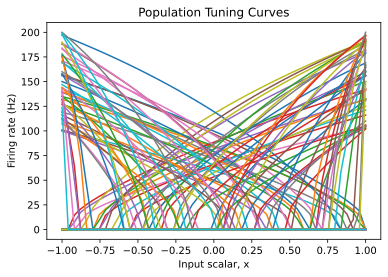

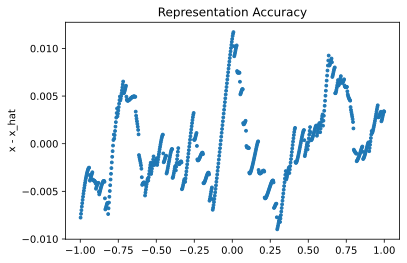

In [2]:
model = nengo.Network()
with model:
    intercepts = np.linspace(-1, 0.999, 100)
    max_rates = np.random.randint(100, 201, 100)
    tau_rc = 0.02
    tau_ref = 0.002
    neurons = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts, max_rates=max_rates,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    dummy = nengo.Connection(neurons, neurons)

with nengo.Simulator(model) as sim:
    tuning_points, activities = tuning_curves(neurons, sim)

eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=dummy, sim=sim)

plt.figure()
plt.plot(tuning_points, activities)
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")
plt.title('Population Tuning Curves')

plt.figure()
plt.scatter(eval_points, x-x_hat, s=8)
plt.ylabel('x - x_hat')
plt.title('Representation Accuracy')

print (f'The RMSE is: {np.sqrt(np.average((x-x_hat)**2))}')

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for radius 0.5 is: 0.0016507187351393485


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for radius 1 is: 0.003301437470278697


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for radius 2 is: 0.006602874940557394


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for radius 4 is: 0.013205749881114788


[None, None, None, None]

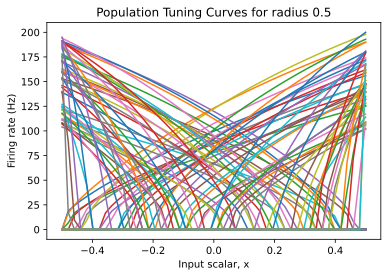

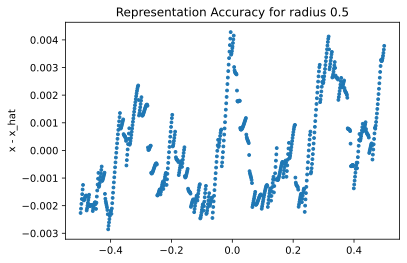

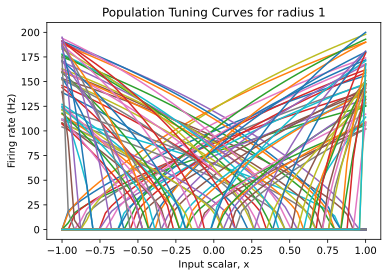

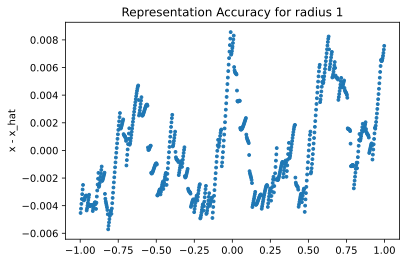

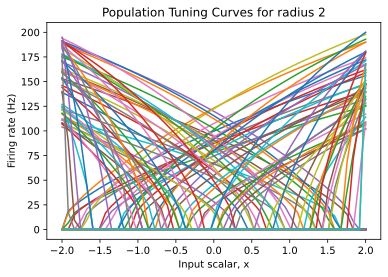

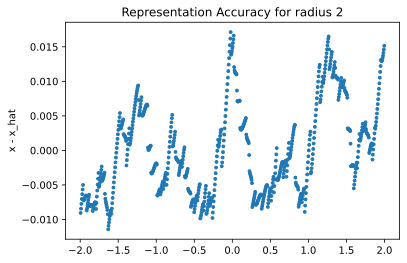

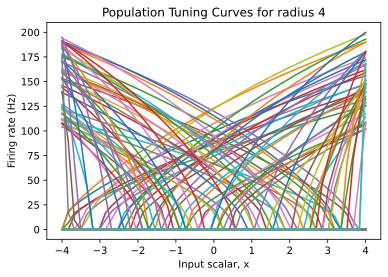

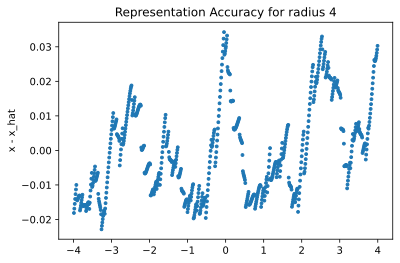

In [3]:
def q1b(radius, max_rates):
    model = nengo.Network(seed=1)
    with model:
        intercepts = np.linspace(-1, 0.999, 100)
#         max_rates = np.random.randint(100, 201, 100)  # defining outside function to keep rates consistent
        tau_rc = 0.02
        tau_ref = 0.002
        neurons = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts, max_rates=max_rates,
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref), radius=radius)
        dummy = nengo.Connection(neurons, neurons)

    with nengo.Simulator(model) as sim:
        tuning_points, activities = tuning_curves(neurons, sim)

    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=dummy, sim=sim)
    
    plt.figure()
    plt.plot(tuning_points, activities)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title(f'Population Tuning Curves for radius {radius}')

    plt.figure()
    plt.scatter(eval_points, x-x_hat, s=8)
    plt.ylabel('x - x_hat')
    plt.title(f'Representation Accuracy for radius {radius}')

    print (f'The RMSE for radius {radius} is: {np.sqrt(np.average((x-x_hat)**2))}')
    
radii = [0.5, 1, 2, 4]
max_rates = np.random.randint(100, 201, 100)
[q1b(x, max_rates) for x in radii]

**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

The mathematical relationship between the radius and the RMSE is that the RMSE is multiplicatively scaled by the radius, i.e., RMSE_output = RMSE * radius. In order words, the RMSE of radius 0.5 is equal to 0.5 * (RMSE_radius1) and the RMSE of radius 2 is equal to 2 * (RMSE_radius1), etc. This is the case as the radius is a scaling factor for the input x and output x_hat, and thus the error between x and x_hat is also scaled by the radius.

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_ref=0.001 is: 0.004449577887971306


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_ref=0.002 is: 0.004853612621117086


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_ref=0.003 is: 0.005379980101954667


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_ref=0.004 is: 0.0059603943748338835


[None, None, None, None]

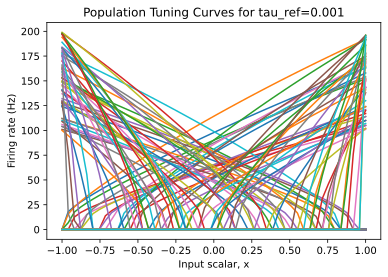

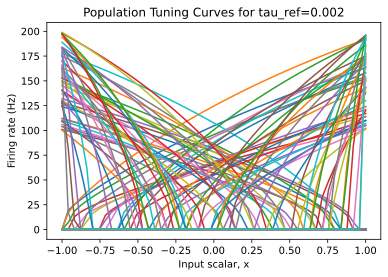

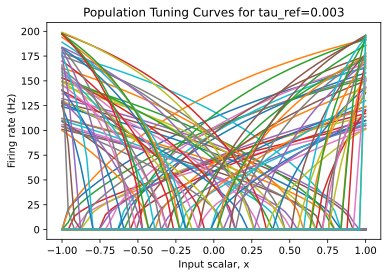

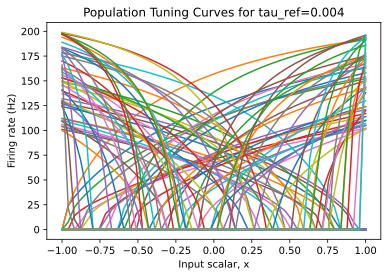

In [4]:
def q1d(tau_ref, max_rates):
    model = nengo.Network(seed=1)
    with model:
        intercepts = np.linspace(-1, 0.999, 100)
#         max_rates = np.random.randint(100, 201, 100)  # defining outside function to keep rates consistent
        tau_rc = 0.02
        neurons = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts, max_rates=max_rates,
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
        dummy = nengo.Connection(neurons, neurons)

    with nengo.Simulator(model) as sim:
        tuning_points, activities = tuning_curves(neurons, sim)

    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=dummy, sim=sim)
    
    plt.figure()
    plt.plot(tuning_points, activities)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title(f'Population Tuning Curves for tau_ref={tau_ref}')

    print (f'The RMSE for tau_ref={tau_ref} is: {np.sqrt(np.average((x-x_hat)**2))}')
    
refracs = [0.001, 0.002, 0.003, 0.004]
max_rates = np.random.randint(100, 201, 100)
[q1d(x, max_rates) for x in refracs]

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_rc=0.01 is: 0.0036052252265633233


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_rc=0.025 is: 0.0032008812768764008


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_rc=0.05 is: 0.003133248787897524


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

The RMSE for tau_rc=0.1 is: 0.0031276240095248907


[None, None, None, None]

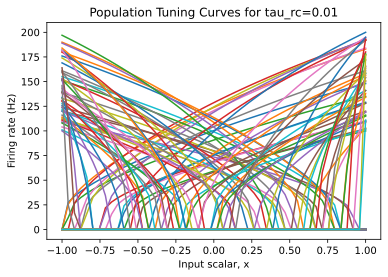

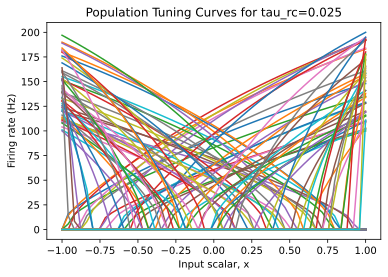

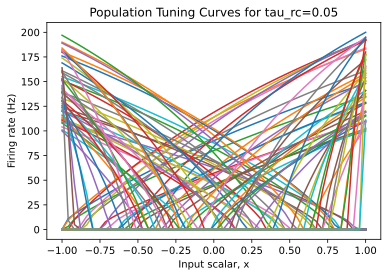

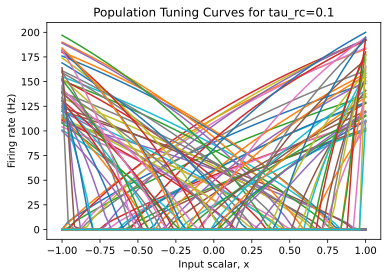

In [5]:
def q1e(tau_rc, max_rates):
    model = nengo.Network(seed=1)
    with model:
        intercepts = np.linspace(-1, 0.999, 100)
#         max_rates = np.random.randint(100, 201, 100)  # defining outside function to keep rates consistent
        tau_ref = 0.002
        neurons = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts, max_rates=max_rates,
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
        dummy = nengo.Connection(neurons, neurons)

    with nengo.Simulator(model) as sim:
        tuning_points, activities = tuning_curves(neurons, sim)

    eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=dummy, sim=sim)
    
    plt.figure()
    plt.plot(tuning_points, activities)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title(f'Population Tuning Curves for tau_rc={tau_rc}')

    print (f'The RMSE for tau_rc={tau_rc} is: {np.sqrt(np.average((x-x_hat)**2))}')
    
mem_tc = [0.01, 0.025, 0.05, 0.1]
max_rates = np.random.randint(100, 201, 100)
[q1e(x, max_rates) for x in mem_tc]

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

As tau_ref increases, the tuning curves of the neurons go from being relatively straight to more rounded. These more rounded/logarithmic looking tuning curves result in slightly increasing RMSE, which is due to neurons introducing larger changes immediately when they become active. These larger immediate changes make it harder to smoothly approximate a signal, making the RMSE increase. This makes sense biologically as well, as neurons with larger gaps between firing would not be able to send as refined signals.
As tau_rc increases, the tuning curves become less linearly steep when they are initially activated. These curves becoming less steep initially result in very slightly increased RMSE as the neurons are less able to replicate quick changes in input shape due to neurons taking slightly longer to produce sufficient outputs. 

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

500


Text(0.5, 1.0, '50 Neuron Identity Representation')

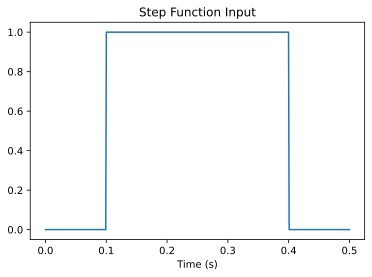

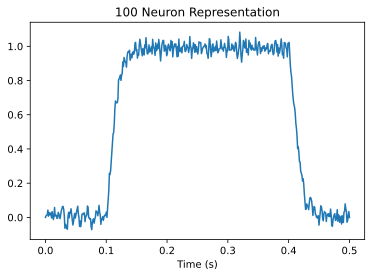

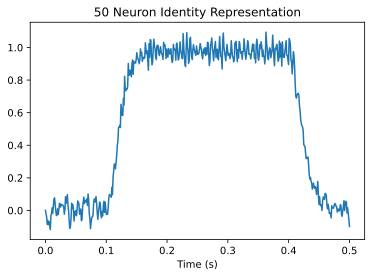

In [6]:
model = nengo.Network()
with model:
    intercepts_100 = np.linspace(-1, 0.999, 100)
    max_rates_100 = np.random.randint(100, 201, 100)
    intercepts_50 = np.linspace(-1, 0.999, 50)
    max_rates_50 = np.random.randint(100, 201, 50)
    tau_rc = 0.02
    tau_ref = 0.002
    
    neurons_100 = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts_100, max_rates=max_rates_100,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    neurons_50 = nengo.Ensemble(n_neurons=50, dimensions=1, intercepts=intercepts_50, max_rates=max_rates_50,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    
    connection = nengo.Connection(neurons_100, neurons_50, synapse=0.01)
    probe_100 = nengo.Probe(neurons_100, synapse=0.01)
    probe_50 = nengo.Probe(neurons_50, synapse=0.01)
    
    nd_input = nengo.Node(nengo.processes.Piecewise({
        0.1: 1.0,
        0.4: 0.0
    }))
    nengo.Connection(nd_input, neurons_100)


with nengo.Simulator(model) as sim:
    sim.run(0.5)

eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=connection, sim=sim)


print(np.size(sim.data[probe_100]))
x_range = np.linspace(0, 0.5, 500)
plot_step_input = []
for i in range(len(x_range)):
    if 0.1 < x_range[i] < 0.4:
        plot_step_input.append(1)
    else:
        plot_step_input.append(0)

plt.figure()
plt.plot(x_range, plot_step_input)
plt.xlabel('Time (s)')
plt.title('Step Function Input')

plt.figure()
plt.plot(x_range, np.concatenate(sim.data[probe_100]))
plt.xlabel('Time (s)')
plt.title('100 Neuron Representation')

plt.figure()
plt.plot(x_range, np.concatenate(sim.data[probe_50]))
plt.xlabel('Time (s)')
plt.title('50 Neuron Identity Representation')

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

500


Text(0.5, 1.0, '50 Neuron 1-2x(t) Representation')

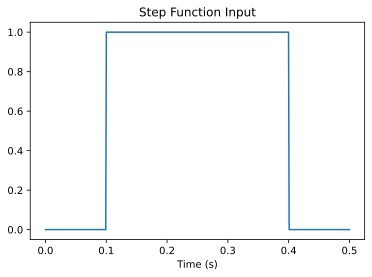

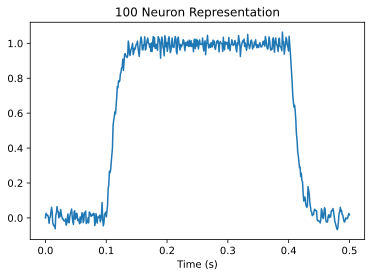

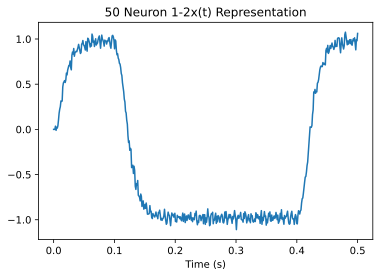

In [7]:
def function(x):
    return 1 - 2*x

model = nengo.Network()
with model:
    intercepts_100 = np.linspace(-1, 0.999, 100)
    max_rates_100 = np.random.randint(100, 201, 100)
    intercepts_50 = np.linspace(-1, 0.999, 50)
    max_rates_50 = np.random.randint(100, 201, 50)
    tau_rc = 0.02
    tau_ref = 0.002
    
    neurons_100 = nengo.Ensemble(n_neurons=100, dimensions=1, intercepts=intercepts_100, max_rates=max_rates_100,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    neurons_50 = nengo.Ensemble(n_neurons=50, dimensions=1, intercepts=intercepts_50, max_rates=max_rates_50,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    
    connection = nengo.Connection(neurons_100, neurons_50, synapse=0.01, function=function)
    probe_100 = nengo.Probe(neurons_100, synapse=0.01)
    probe_50 = nengo.Probe(neurons_50, synapse=0.01)
    
    piecewise_input = nengo.Node(nengo.processes.Piecewise({
        0.1: 1.0,
        0.4: 0.0
    }))
    nengo.Connection(piecewise_input, neurons_100)


with nengo.Simulator(model) as sim:
    sim.run(0.5)

eval_points, x, x_hat = nengo.utils.connection.eval_point_decoding(conn=connection, sim=sim)


print(np.size(sim.data[probe_100]))
x_range = np.linspace(0, 0.5, 500)
plot_step_input = []
for i in range(len(x_range)):
    if 0.1 < x_range[i] < 0.4:
        plot_step_input.append(1)
    else:
        plot_step_input.append(0)

plt.figure()
plt.plot(x_range, plot_step_input)
plt.xlabel('Time (s)')
plt.title('Step Function Input')

plt.figure()
plt.plot(x_range, np.concatenate(sim.data[probe_100]))
plt.xlabel('Time (s)')
plt.title('100 Neuron Representation')

plt.figure()
plt.plot(x_range, np.concatenate(sim.data[probe_50]))
plt.xlabel('Time (s)')
plt.title('50 Neuron 1-2x(t) Representation')

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

The matricies $\mathbf{A}$ and $\mathbf{B}$ are:

$\mathbf{A} = \frac{\mathrm{1}}{\mathrm{tau}}(\mathbf{A}' - \mathbf{I}$)

$\mathbf{B} = \frac{\mathrm{1}}{\mathrm{tau}}(\mathbf{B}'$)

The needed matricies $\mathbf{A}'$ and $\mathbf{B}'$ are:

$\mathbf{A}' = (tau)(\mathbf{A}) + \mathbf{I}$

$\mathbf{B}' = (tau)(\mathbf{B})$

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Ensemble Represented Piecewise Integral')

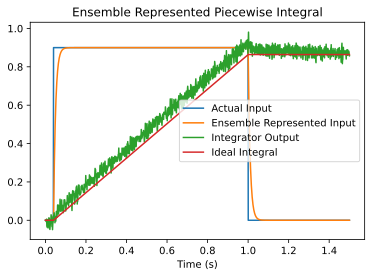

In [8]:
from scipy import integrate

model = nengo.Network()
with model:
    intercepts = np.linspace(-1, 0.999, 200)
    max_rates = np.random.randint(100, 201, 200)
    tau_rc = 0.02
    tau_ref = 0.002
    
    neurons = nengo.Ensemble(n_neurons=200, dimensions=1, intercepts=intercepts, max_rates=max_rates,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))
    
    recurrent = nengo.Connection(neurons, neurons, transform=[[1]], synapse=0.05)
    
    piecewise_input = nengo.Node(nengo.processes.Piecewise({
        0.04: 0.9,
        1.0: 0.0
    }))
    nengo.Connection(piecewise_input, neurons, transform=[[0.05]], synapse=0.005)
    
    input_probe = nengo.Probe(piecewise_input, synapse=0.01)
    neurons_probe = nengo.Probe(neurons, synapse=0.01)
    
with nengo.Simulator(model) as sim:
    sim.run(1.5)

x_range = np.linspace(0, 1.5, np.size(sim.data[input_probe]))
step_input = []
step_input_integral = []
for i in range(len(x_range)):
    if x_range[i] < 0.04:
        step_input.append(0)
        step_input_integral.append(0)
    elif 0.04 <= x_range[i] < 1.0:
        step_input.append(0.9)
        step_input_integral.append((0.9*x_range[i])-(0.04*0.9))
    else:
        step_input.append(0)
        step_input_integral.append(0.9 - (0.04*0.9))

plt.figure()
plt.plot(x_range, step_input, label='Actual Input')
plt.plot(sim.trange(), sim.data[input_probe], label='Ensemble Represented Input')
plt.plot(sim.trange(), sim.data[neurons_probe], label='Integrator Output')
plt.plot(x_range, step_input_integral, label='Ideal Integral')
plt.legend()
plt.xlabel('Time (s)')
plt.title('Ensemble Represented Piecewise Integral')



**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

The integral of the step function can be defined with the following equation:

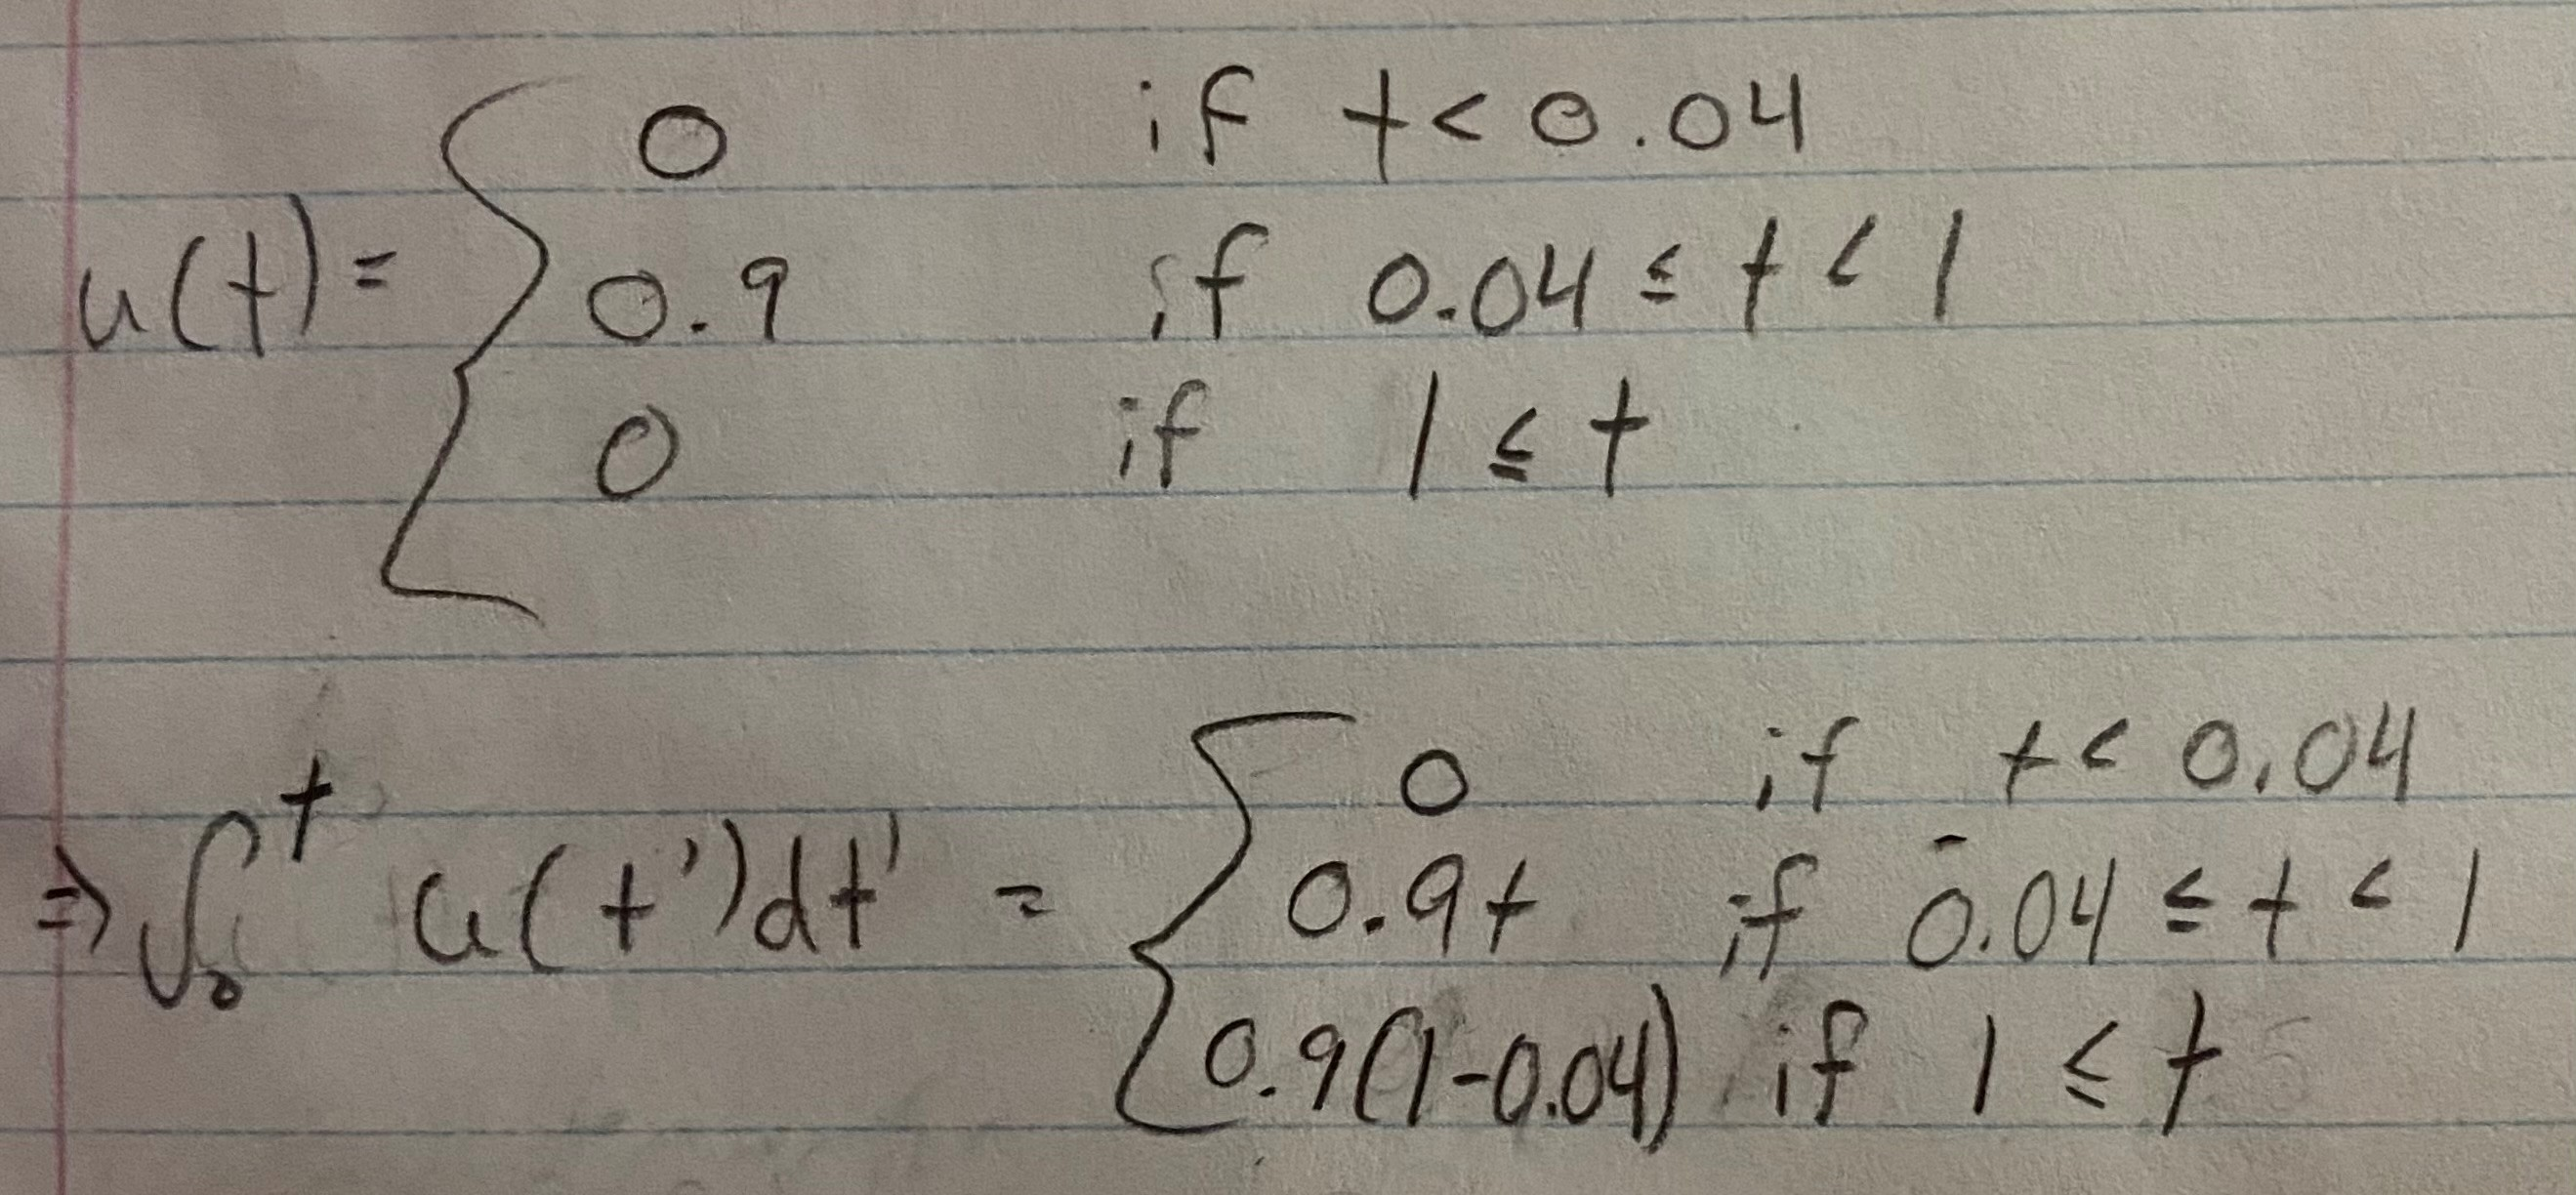

The simulated output has a higher slope than the ideal integral when it is increasing from 0.04 <= t < 1, causing it to output a higher value for this range. After t = 1, the integrator output slowly starts decreasing to more closely match the ideal integral. When doing testing, running the simulation for 3 seconds instead of the requested 1.5 seconds showed this trend continuing until the integrator output nearly matches the ideal integrator, accounting for the noise. The integrator output also has much more noise than the ideal integral, but this is expected due to the spiking nature of neurons.

Also, note that the 0.9(1-0.04) in the third case comes from the integral constant that represents the area previously accrued from when the piecewise function was active in the second case.

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

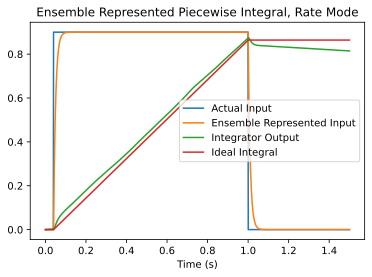

In [9]:
def q3(neuron_type, input_high_range):    
    model = nengo.Network()
    with model:
        intercepts = np.linspace(-1, 0.999, 200)
        max_rates = np.random.randint(100, 201, 200)
        tau_rc = 0.02
        tau_ref = 0.002

        neurons = nengo.Ensemble(n_neurons=200, dimensions=1, intercepts=intercepts, max_rates=max_rates,
        neuron_type=neuron_type)

        recurrent = nengo.Connection(neurons, neurons, transform=[[1]], synapse=0.05)

        piecewise_input = nengo.Node(nengo.processes.Piecewise({
            input_high_range[0]: 0.9,
            input_high_range[1]: 0.0
        }))
        nengo.Connection(piecewise_input, neurons, transform=[[0.05]], synapse=0.005)

        input_probe = nengo.Probe(piecewise_input, synapse=0.01)
        neurons_probe = nengo.Probe(neurons, synapse=0.01)

    with nengo.Simulator(model) as sim:
        sim.run(1.5)

    x_range = np.linspace(0, 1.5, np.size(sim.data[input_probe]))
    step_input = []
    step_input_integral = []
    for i in range(len(x_range)):
        if x_range[i] < input_high_range[0]:
            step_input.append(0)
            step_input_integral.append(0)
        elif input_high_range[0] <= x_range[i] < input_high_range[1]:
            step_input.append(0.9)
            step_input_integral.append((0.9*x_range[i])-(input_high_range[0]*0.9))
        else:
            step_input.append(0)
            step_input_integral.append(0.9*(input_high_range[1] - input_high_range[0]))

    plt.figure()
    plt.plot(x_range, step_input, label='Actual Input')
    plt.plot(sim.trange(), sim.data[input_probe], label='Ensemble Represented Input')
    plt.plot(sim.trange(), sim.data[neurons_probe], label='Integrator Output')
    plt.plot(x_range, step_input_integral, label='Ideal Integral')
    plt.legend()
    plt.xlabel('Time (s)')
    # sloppy but too tired to fix it, sorry about that
    if neuron_type == nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref):  
        plt.title('Ensemble Represented Piecewise Integral, Rate Mode')
    else:
        plt.title('Ensemble Represented Short Piecewise Integral')

q3(neuron_type=nengo.LIFRate(tau_rc=tau_rc, tau_ref=tau_ref), input_high_range=[0.04, 1])

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

Changing the neuron mode to rate significantly reduced the noise outputted in the plot due to taking the overall rate of the neurons instead of LIF spiking patterns. This mode's output also follows the ideal integral much more closely, especially during the time frame of the input being 0.9. There are still deviations in the output, however, such as the not completely linear slope and the decrease in output when the input goes from 0.9 to 0 at t=1. These deviations, particularly the deviations around sharp changes in input value, are due to the neurons having difficulties perfectly modelling sudden changes in value and the integrator output overcorrecting in the attempt to match up with the sudden changes in the ideal integral.

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

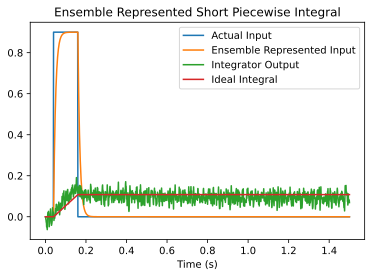

In [10]:
q3(neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref), input_high_range=[0.04, 0.16])

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

Comparibly to b, the integrator output and ideal integral have a much lower value after the step input returns to 0. This occurs due to the input having less time to build up area under it's curve and thus the integral should be a smaller value, so this does still work as intended. As proof of this, the integrator and ideal integral outputs are similar in shape and value, with the slight deviations from part b still being present.

The ideal equation does not change much from part b, with just the range for cases 2 and 3 changing and the output for case 3 changing from 0.9*(1-0.04) to 0.9*(0.16-0.04). Also, note that the 0.9(0.16-0.04) in the third case again comes from the integral constant that represents the area previously accrued from when the piecewise function was active in the second case.

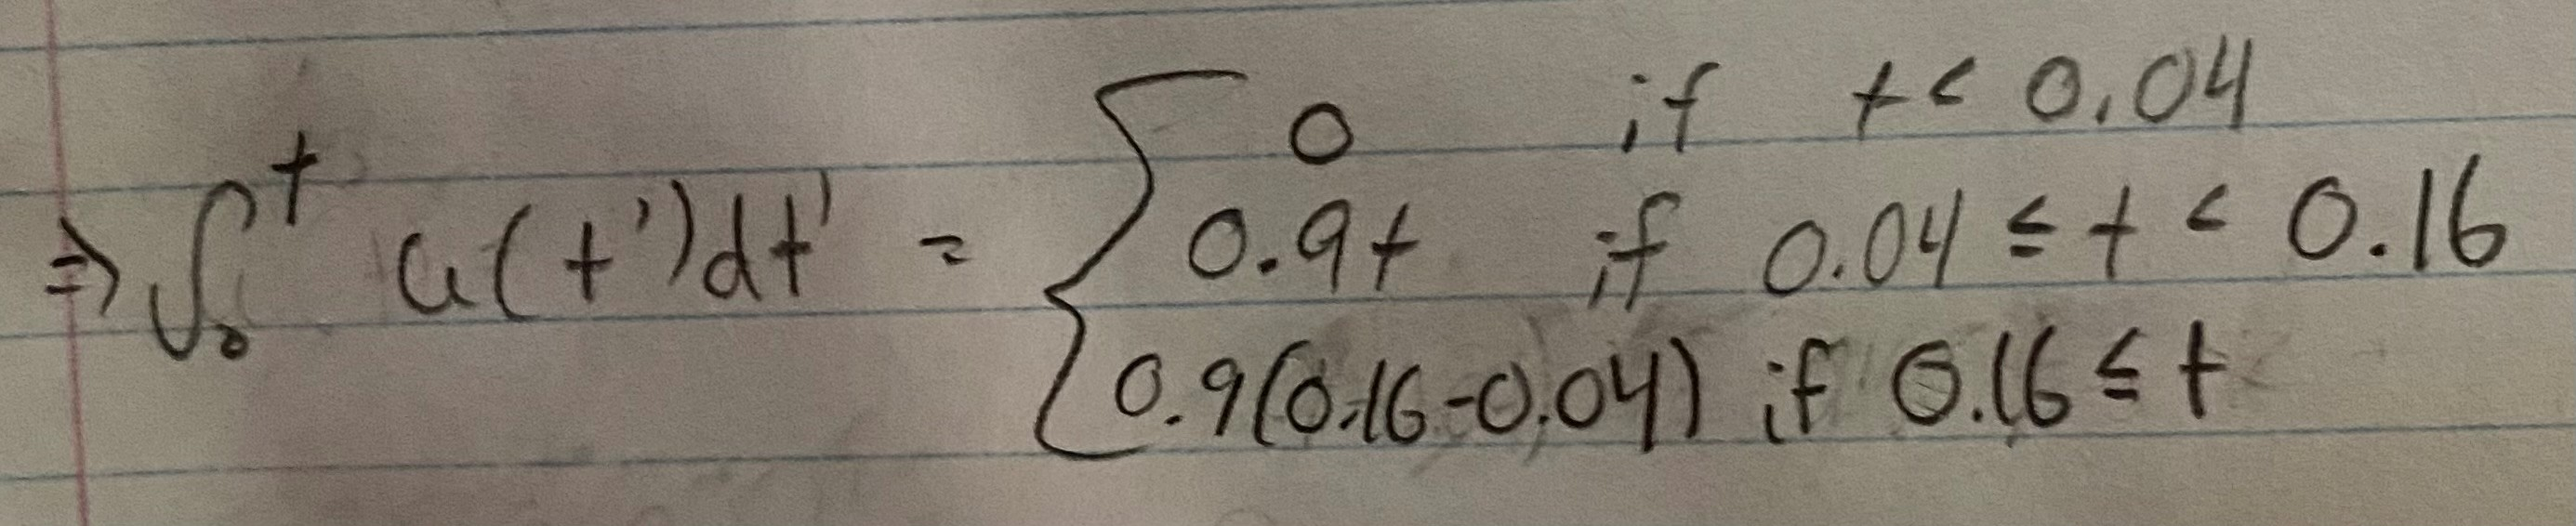

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Ensemble Represented Ramp Integral')

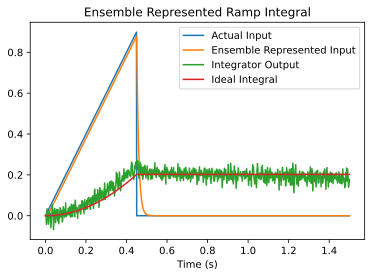

In [11]:
model = nengo.Network()
with model:
    intercepts = np.linspace(-1, 0.999, 200)
    max_rates = np.random.randint(100, 201, 200)
    tau_rc = 0.02
    tau_ref = 0.002

    neurons = nengo.Ensemble(n_neurons=200, dimensions=1, intercepts=intercepts, max_rates=max_rates,
    neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))

    recurrent = nengo.Connection(neurons, neurons, transform=[[1]], synapse=0.05)

    ramp_node = nengo.Node(lambda t: 2*t if t < 0.45 else 0.0)
    nengo.Connection(ramp_node, neurons, transform=[[0.05]], synapse=0.005)

    input_probe = nengo.Probe(ramp_node, synapse=0.01)
    neurons_probe = nengo.Probe(neurons, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(1.5)

x_range = np.linspace(0, 1.5, np.size(sim.data[input_probe]))
ramp_input = []
ramp_input_integral = []
for i in range(len(x_range)):
    if x_range[i] < 0.45:
        ramp_input.append(x_range[i]*2)
        ramp_input_integral.append(pow(x_range[i], 2))
    else:
        ramp_input.append(0)
        ramp_input_integral.append(pow(0.45, 2))

plt.figure()
plt.plot(x_range, ramp_input, label='Actual Input')
plt.plot(sim.trange(), sim.data[input_probe], label='Ensemble Represented Input')
plt.plot(sim.trange(), sim.data[neurons_probe], label='Integrator Output')
plt.plot(x_range, ramp_input_integral, label='Ideal Integral')
plt.legend()
plt.xlabel('Time (s)')
plt.title('Ensemble Represented Ramp Integral')

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

For the ramp part of the input, both the ensemble and ideal integral increase exponentially until the end of the ramp, in which the value remains constant at 0.45^2. This happens because the area under the ramp increases more quickly as the ramp value gets larger, meaning the integral of the ramp input will be non-linear. In fact, since the ramp scales linearly with t, the integral will increase at a rate of t^2 in the ramp. This can be confirmed in the derivation of the ideal integral curve below. Also, note that the 0.45^2 in the second case comes from the integral constant that represents the area previously accrued from when the ramp function was active in the first case.

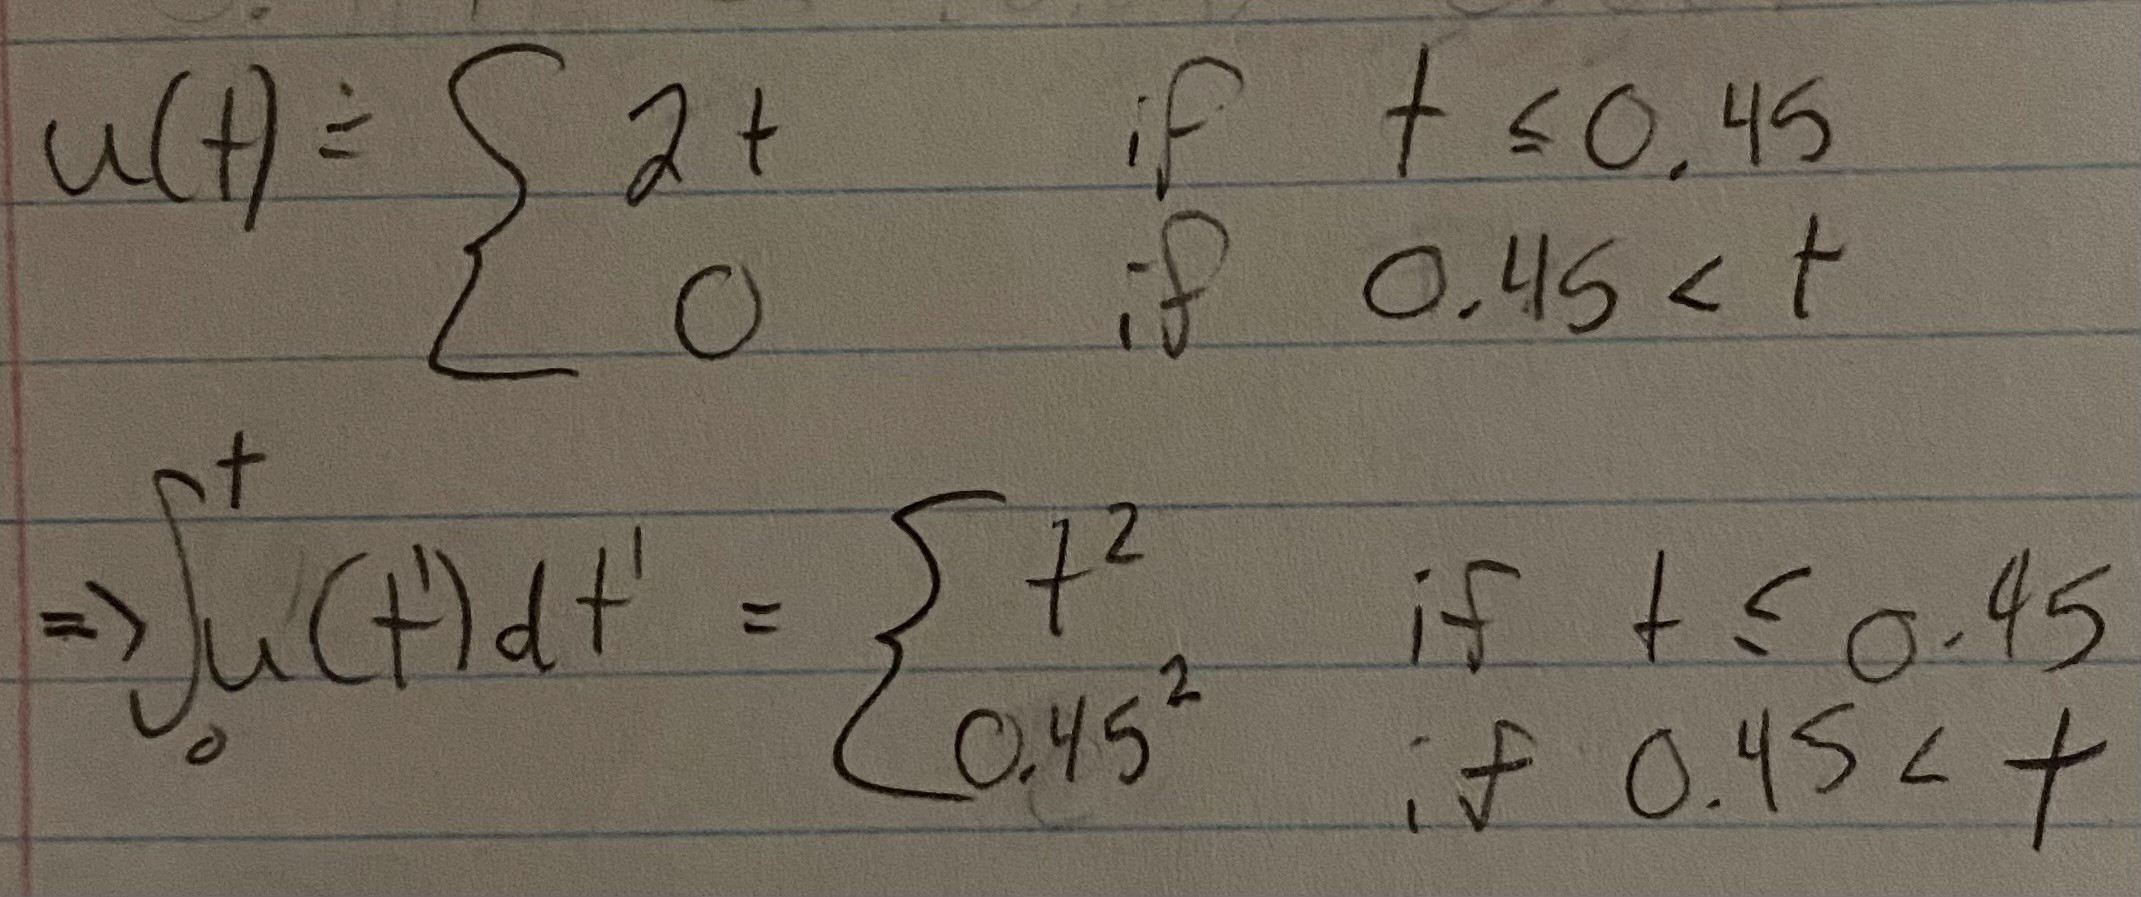

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

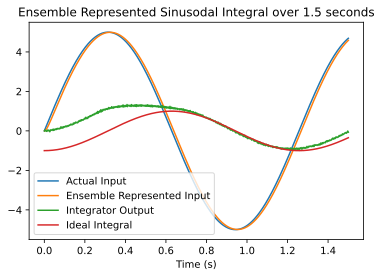

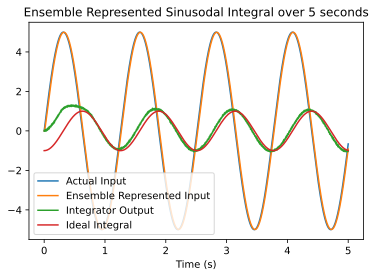

In [12]:
def q3j(run_time):
    model = nengo.Network()
    with model:
        intercepts = np.linspace(-1, 0.999, 200)
        max_rates = np.random.randint(100, 201, 200)
        tau_rc = 0.02
        tau_ref = 0.002

        neurons = nengo.Ensemble(n_neurons=200, dimensions=1, intercepts=intercepts, max_rates=max_rates,
        neuron_type=nengo.LIF(tau_rc=tau_rc, tau_ref=tau_ref))

        recurrent = nengo.Connection(neurons, neurons, transform=[[1]], synapse=0.05)

        ramp_node = nengo.Node(lambda t: 5*np.sin(5*t))
        nengo.Connection(ramp_node, neurons, transform=[[0.05]], synapse=0.005)

        input_probe = nengo.Probe(ramp_node, synapse=0.01)
        neurons_probe = nengo.Probe(neurons, synapse=0.01)

    with nengo.Simulator(model) as sim:
        sim.run(run_time)

    x_range = np.linspace(0, run_time, np.size(sim.data[input_probe]))
    ramp_input = []
    ramp_input_integral = []
    for i in range(len(x_range)):
        ramp_input.append(5*np.sin(5*x_range[i]))
        ramp_input_integral.append(-1*np.cos(5*x_range[i]))

    plt.figure()
    plt.plot(x_range, ramp_input, label='Actual Input')
    plt.plot(sim.trange(), sim.data[input_probe], label='Ensemble Represented Input')
    plt.plot(sim.trange(), sim.data[neurons_probe], label='Integrator Output')
    plt.plot(x_range, ramp_input_integral, label='Ideal Integral')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.title(f'Ensemble Represented Sinusodal Integral over {run_time} seconds')

q3j(1.5)
q3j(5)

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

The value represented by the ensemble should be the integral of 5sin(5t) from 0 to t, which is equal to -cos(5t). A more clear writing of the equations can be seen below.

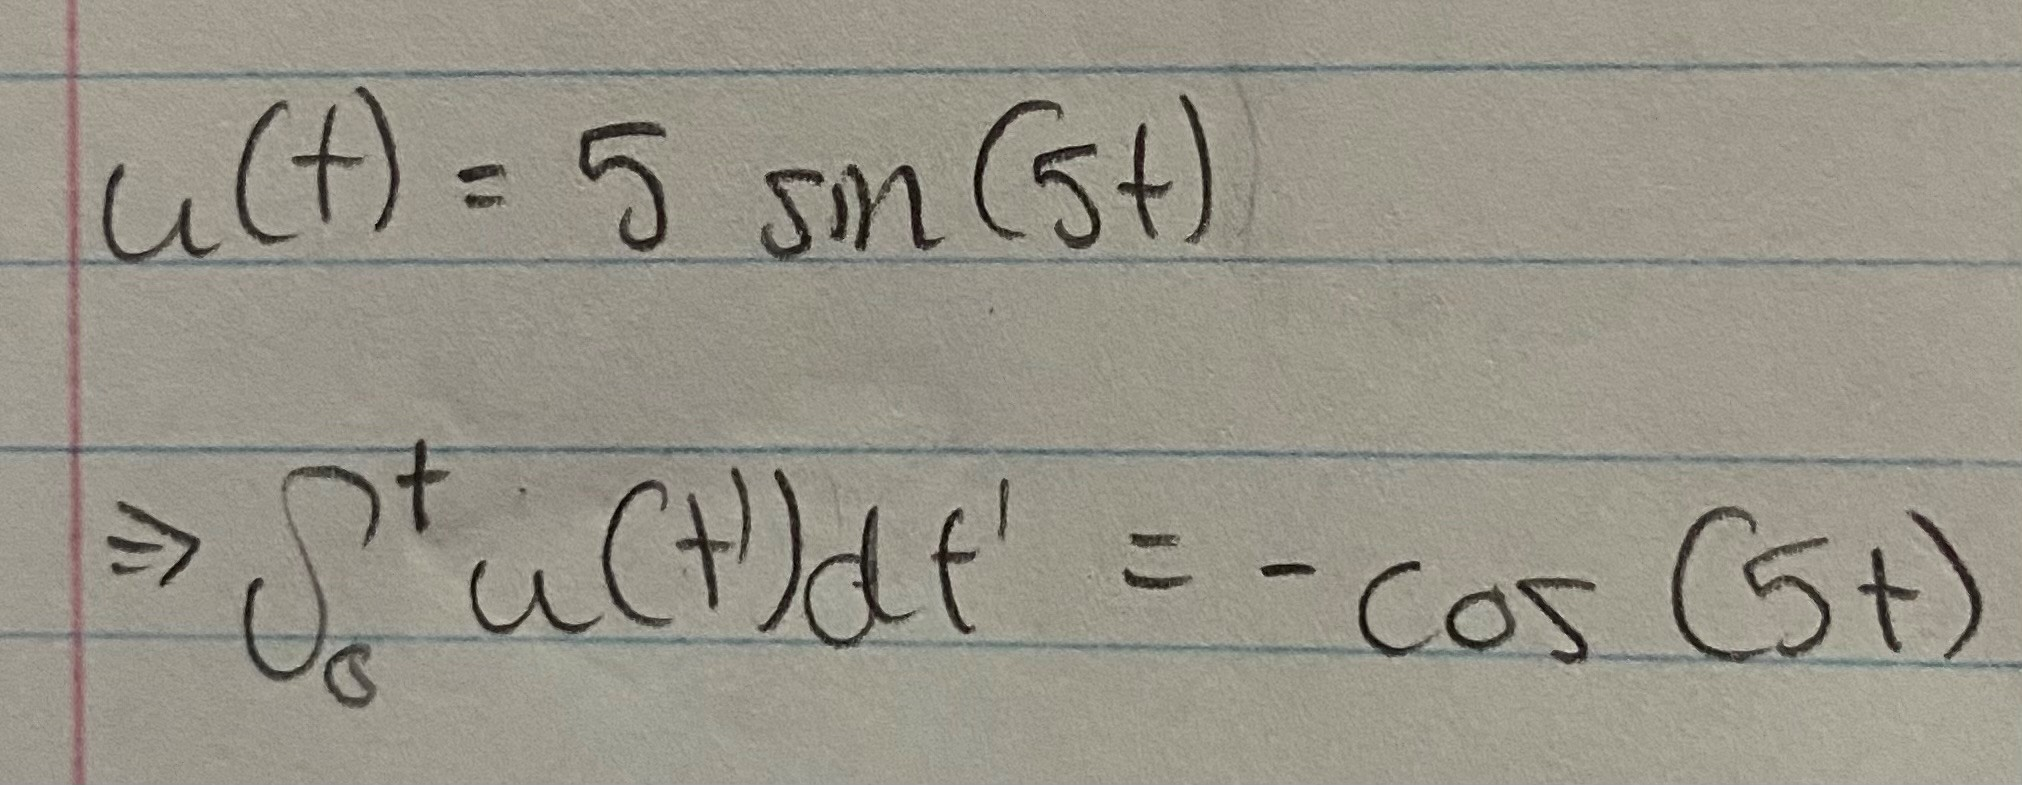

The ensemble follows the expected ideal integral value prettty well after the first ~0.5 second of the simulation. The main difference between the model's behaviour and expected ideal behaviour is that the model output starts at 0 and tries to model the initial area under the curve of the sine function, leading to a larger value than seen by the ideal integral. This difference occurs because the ideal integral takes all previous values of sin into account, and hence starts at a value of -1 at a time of 0 due to the sin values from before 0 seconds being negative. The model does not have this information, and thus models the integral with a higher than expected value for the first few oscillations. With each oscillation, the effect of missing out on function information from before t=0 is reduced due to a larger sample window giving the model more time to average the function over, causing the model output to become closer to ideal the longer the simulation is run.

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>